In [1]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading the data

In [3]:
df=pd.read_csv('loan.csv')

In [6]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


here loan id is not important for the data but first lets check it is unique or not for all

In [5]:
df['Loan_ID'].nunique()

614

all the loan id is different so we can drop this

In [7]:
df.drop('Loan_ID',axis=1,inplace=True)

In [8]:
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

columns have float, integer and object type

In [9]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


we can see dependent column is of object type but it is actually filled with numbers

In [11]:
#checking column Dependents

In [12]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

we have a value 3+ in the column, so the column is recognized as object type

In [26]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [13]:
#checking for missing values


In [14]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [15]:
#visualizing it by heatmap

<AxesSubplot:>

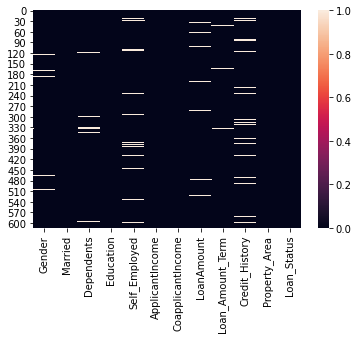

In [16]:
sns.heatmap(df.isnull())

missing values are there

In [17]:
df['Gender'].nunique()


2

Male      489
Female    112
Name: Gender, dtype: int64


<AxesSubplot:xlabel='Gender', ylabel='count'>

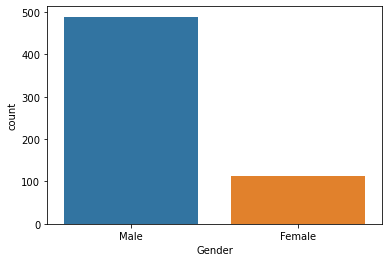

In [18]:
print(df['Gender'].value_counts())
sns.countplot(df['Gender'] )

no of male are more

filling the missing values with male

In [19]:
df['Gender'].fillna('Male',inplace=True)

Yes    398
No     213
Name: Married, dtype: int64


<AxesSubplot:xlabel='Married', ylabel='count'>

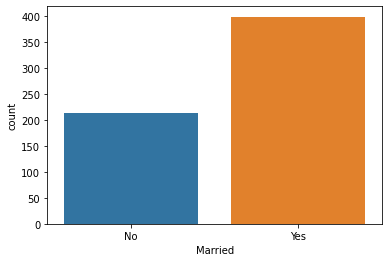

In [20]:
print(df['Married'].value_counts())
sns.countplot(df['Married'] )

Married people are more so filling the missing values with married 

In [21]:
df['Married'].fillna('Yes',inplace=True)

In [22]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

filling the missing values with 0

In [23]:
df['Dependents'].fillna('0',inplace=True)

No     500
Yes     82
Name: Self_Employed, dtype: int64


<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

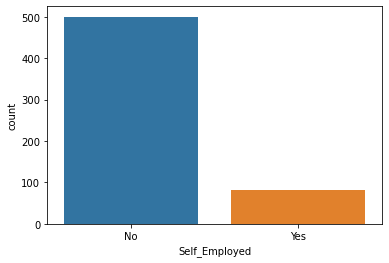

In [24]:
print(df['Self_Employed'].value_counts())
sns.countplot(df['Self_Employed'] )

In [27]:
df['Self_Employed'].fillna('No',inplace=True)

In [28]:
df['LoanAmount'].value_counts()

120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
211.0     1
250.0     1
62.0      1
85.0      1
436.0     1
Name: LoanAmount, Length: 203, dtype: int64

In [29]:
df['LoanAmount'].describe()

count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64

filling the missing values with median as mean is more

In [30]:
df['LoanAmount'].fillna(df['LoanAmount'].median(),inplace=True)

In [31]:
df['Loan_Amount_Term'].describe()

count    600.00000
mean     342.00000
std       65.12041
min       12.00000
25%      360.00000
50%      360.00000
75%      360.00000
max      480.00000
Name: Loan_Amount_Term, dtype: float64

In [32]:
df['Loan_Amount_Term'].median()

360.0

filling the missing values with mean as it is less than median

In [33]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(),inplace=True)

In [34]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

It might be do not have any previous credit, filling with no previous i.e 0 

In [35]:
df['Credit_History'].fillna(0,inplace=True)

In [36]:
#checking again missing values 
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

no misisng values now

In [37]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [38]:
df['Property_Area']=le.fit_transform(df['Property_Area'])

In [39]:
df['Gender']=le.fit_transform(df['Gender'])

In [40]:
df['Loan_Status']=le.fit_transform(df['Loan_Status'])

In [41]:
df['Self_Employed']=le.fit_transform(df['Self_Employed'])

In [42]:
df['Education']=le.fit_transform(df['Education'])

In [43]:
df['Dependents']=le.fit_transform(df['Dependents'])

In [44]:
df['Married']=le.fit_transform(df['Married'])

In [45]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [46]:
df.dtypes

Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

all the columns are encoded

In [47]:
#checking skewness

In [48]:
df.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.743053
Loan_Amount_Term    -2.389680
Credit_History      -1.310835
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

In [49]:
#removing skewness with zscore
from scipy.stats import zscore
z=abs(zscore(df))
df_new=df[(z<3).all(axis=1)]

In [50]:
df_new.shape

(577, 12)

after removing outliers, 577 rows are there

In [51]:
df_new.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.151525
Loan_Amount_Term    -2.077031
Credit_History      -1.306588
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

In [52]:
df_new['ApplicantIncome']=np.log(df['ApplicantIncome'])
df_new['ApplicantIncome'].skew()

-0.20796709470129843

In [53]:
df_new['CoapplicantIncome']=np.log(df['CoapplicantIncome']+1)
df_new['CoapplicantIncome'].skew()

-0.21675695794770106

Gender                   AxesSubplot(0.125,0.71587;0.168478x0.16413)
Married               AxesSubplot(0.327174,0.71587;0.168478x0.16413)
Dependents            AxesSubplot(0.529348,0.71587;0.168478x0.16413)
Education             AxesSubplot(0.731522,0.71587;0.168478x0.16413)
Self_Employed           AxesSubplot(0.125,0.518913;0.168478x0.16413)
ApplicantIncome      AxesSubplot(0.327174,0.518913;0.168478x0.16413)
CoapplicantIncome    AxesSubplot(0.529348,0.518913;0.168478x0.16413)
LoanAmount           AxesSubplot(0.731522,0.518913;0.168478x0.16413)
Loan_Amount_Term        AxesSubplot(0.125,0.321957;0.168478x0.16413)
Credit_History       AxesSubplot(0.327174,0.321957;0.168478x0.16413)
Property_Area        AxesSubplot(0.529348,0.321957;0.168478x0.16413)
Loan_Status          AxesSubplot(0.731522,0.321957;0.168478x0.16413)
dtype: object

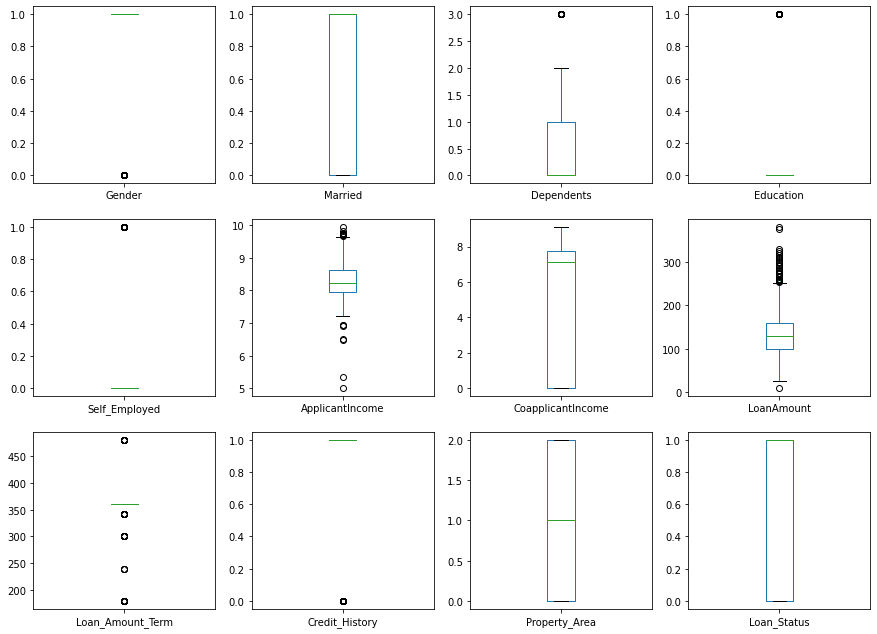

In [54]:
df_new.plot(kind='box',subplots=True,layout=(4,4),figsize=(15,15))

we can still remove skewness in loanamount and loan amount term

In [55]:
df_new['LoanAmount']=np.log(df['LoanAmount'])
df_new['LoanAmount'].skew()

-0.7124323701517151

In [56]:
df_new['Loan_Amount_Term']=np.square(df['Loan_Amount_Term'])
df_new['Loan_Amount_Term'].skew()

-0.9092798701786868

In [57]:
df_new.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome     -0.207967
CoapplicantIncome   -0.216757
LoanAmount          -0.712432
Loan_Amount_Term    -0.909280
Credit_History      -1.306588
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

In [58]:
#checking corelation

plt.figure(figsize=(10,8))
sns.heatmap(df_new.corr(),annot=True)

In [60]:
#splitting the data into x and y

In [61]:
x=df_new.drop('Loan_Status',axis=1)
y=df_new['Loan_Status']

In [62]:
#Let us scale the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [63]:
#Balancing the dataset
from imblearn.over_sampling import SMOTE
smt=SMOTE()
xb,yb=smt.fit_resample(x,y)

data is balanced now

In [64]:
yb.value_counts()

0    398
1    398
Name: Loan_Status, dtype: int64

In [65]:
#Sending the data for machine learning model

In [66]:
#Finding the best fit
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
sc=0
rs=0
lr=LogisticRegression()
for i in range(1000):
    x_train,x_test,y_train,y_test=train_test_split(xb,yb,test_size=0.23,random_state=i)
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>sc:
        sc=acc
        rs=i
print(f'Best accuracy {sc} at random state {rs}')

Best accuracy 0.7989130434782609 at random state 353


In [67]:
x_train,x_test,y_train,y_test=train_test_split(xb,yb,test_size=0.23,random_state=353)

In [68]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
models=[LogisticRegression(),SVC(),DecisionTreeClassifier(),RandomForestClassifier(),GradientBoostingClassifier()]
for m in models:
    m.fit(x_train,y_train)
    predm=m.predict(x_test)
    print(f'{m}:')
    print('accuracy score:',accuracy_score(y_test,predm))
    print('confusion matrix:\n',confusion_matrix(y_test,predm))
    print('classification report:\n',classification_report(y_test,predm))
    cvscore=cross_val_score(m,xb,yb,cv=5)
    print('Mean cv score:',cvscore.mean())
    print('\n')

LogisticRegression():
accuracy score: 0.7989130434782609
confusion matrix:
 [[48 28]
 [ 9 99]]
classification report:
               precision    recall  f1-score   support

           0       0.84      0.63      0.72        76
           1       0.78      0.92      0.84       108

    accuracy                           0.80       184
   macro avg       0.81      0.77      0.78       184
weighted avg       0.81      0.80      0.79       184

Mean cv score: 0.7185927672955975


SVC():
accuracy score: 0.7989130434782609
confusion matrix:
 [[53 23]
 [14 94]]
classification report:
               precision    recall  f1-score   support

           0       0.79      0.70      0.74        76
           1       0.80      0.87      0.84       108

    accuracy                           0.80       184
   macro avg       0.80      0.78      0.79       184
weighted avg       0.80      0.80      0.80       184

Mean cv score: 0.7311713836477988


DecisionTreeClassifier():
accuracy score: 0.75
conf

Random forest is giving best accuracy i.e approx 85%

In [69]:
from sklearn.model_selection import GridSearchCV
par={'n_estimators':range(100,1000,100),'criterion':['gini','entropy'],'max_depth':range(0,20),
    'min_samples_leaf':range(2,21,2),'min_samples_split':range(0,10),'max_features':['auto','sqrt','log2']}
grid=GridSearchCV(RandomForestClassifier(),param_grid=par,cv=5,verbose=True)
grid.fit(x_train,y_train)
print('score: ',grid.best_score_)
print('best estimators:',grid.best_estimator_)
print('best parameters:',grid.best_params_)

Fitting 5 folds for each of 108000 candidates, totalling 540000 fits


KeyboardInterrupt: 

In [70]:
rf=RandomForestClassifier(criterion='gini',max_depth=5,max_features='sqrt',min_samples_leaf=2,min_samples_split=6,n_estimators=100)
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
print('score: ',accuracy_score(y_test,pred))
print('confusion matrix:\n ',confusion_matrix(y_test,pred))
print('classification report: ',classification_report(y_test,pred))
predictions=le.inverse_transform(pred)

score:  0.842391304347826
confusion matrix:
  [[57 19]
 [10 98]]
classification report:                precision    recall  f1-score   support

           0       0.85      0.75      0.80        76
           1       0.84      0.91      0.87       108

    accuracy                           0.84       184
   macro avg       0.84      0.83      0.83       184
weighted avg       0.84      0.84      0.84       184



In [71]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
print('score: ',accuracy_score(y_test,pred))
print('confusion matrix:\n ',confusion_matrix(y_test,pred))
print('classification report: ',classification_report(y_test,pred))
predictions=le.inverse_transform(pred)

score:  0.842391304347826
confusion matrix:
  [[61 15]
 [14 94]]
classification report:                precision    recall  f1-score   support

           0       0.81      0.80      0.81        76
           1       0.86      0.87      0.87       108

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184



In [72]:
results=pd.DataFrame({})
results['Actual']=y_test
results['Predicted']=pred
results

,Actual,Predicted
484,1,1
248,1,1
437,1,1
656,0,0
460,1,1
...,...,...
144,1,1
131,0,0
720,0,0
695,0,0


The output is in 0 and 1

but we want to see the normal. So let us reverse them.

In [73]:
#Reversing the encoded values in prediction
ractual=le.inverse_transform(y_test)
ractual

array(['Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes',
       'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes',
       'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No',
       'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes',
       'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'No',
       'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes',
       'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'No',
       'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes',
       'No', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No',
       'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes',
       'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'Ye

In [74]:
rpredicted=le.inverse_transform(pred)
rpredicted

array(['Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No',
       'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes',
       'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes',
       'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes',
       'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Yes',
       'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes',
       'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'No', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No',
       'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No',
       'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes',
       'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes',
       'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 

In [75]:
results['Actual_O']=ractual
results['Predicted_r']=rpredicted
results

,Actual,Predicted,Actual_O,Predicted_r
484,1,1,Yes,Yes
248,1,1,Yes,Yes
437,1,1,Yes,Yes
656,0,0,No,No
460,1,1,Yes,Yes
...,...,...,...,...
144,1,1,Yes,Yes
131,0,0,No,No
720,0,0,No,No
695,0,0,No,No


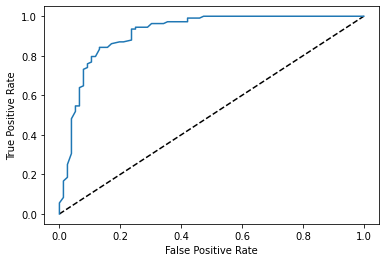

Score: 0.8365009746588693


In [76]:
from sklearn.metrics import roc_auc_score
#Predicting the probability of having 1 in the x-test
y_pred_prob=rf.predict_proba(x_test)[:,1]

from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='KNeighborsClassifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
auc_score=roc_auc_score(y_test,rf.predict(x_test))
print('Score:',auc_score)

In [77]:
#Saving the model
import joblib
joblib.dump(rf,'loan.obj')

['loan.obj']